In [1]:
import numpy as np
import scipy as sp
import sympy as sm
import pandas as pd
import timeit
import matplotlib.pyplot as plt


In [2]:
x = sm.Symbol('x')

In [3]:
df = 6*0.01*((1/6)*x**6 - (1/3)*x**3 - (1/0.05)*x**2 - 1.5*x - 1.*x**3)
Vdf = -1*sm.diff(df, x)
Vdf

-0.06*x**5 + 0.24*x**2 + 2.4*x + 0.09

In [4]:
df

0.01*x**6 - 0.08*x**3 - 1.2*x**2 - 0.09*x

In [5]:
mu, x = sm.symbols('mu, x')
vdp = mu*(3.5-0.25*x**3 + 2*x)
vdp1 = sm.lambdify([mu, x], vdp)

In [7]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
 
c1 = c.subs({I0 : 0.5, Ac_F: 4, r : 1.2, F_p : 0.5}) ##Ac_F = 2 for higher adaptive capacity
c2 = sm.lambdify(F, c1, "numpy" )
c

A_c_F/(1 + exp(-r*(F - F_p))) + I0

In [8]:
t, f0 = sm.symbols('t, f_0')
F = f0*sm.sin(t) + 1.1*f0
F

f_0*sin(t) + 1.1*f_0

In [9]:
F1 = sm.lambdify([f0, t], F, "numpy")
tm = np.linspace(0, 100, 10001)
F2=F1(10,tm)
F2

array([11.        , 11.09999833, 11.19998667, ...,  5.76490401,
        5.85036632,  5.93634359])

<IPython.core.display.Javascript object>


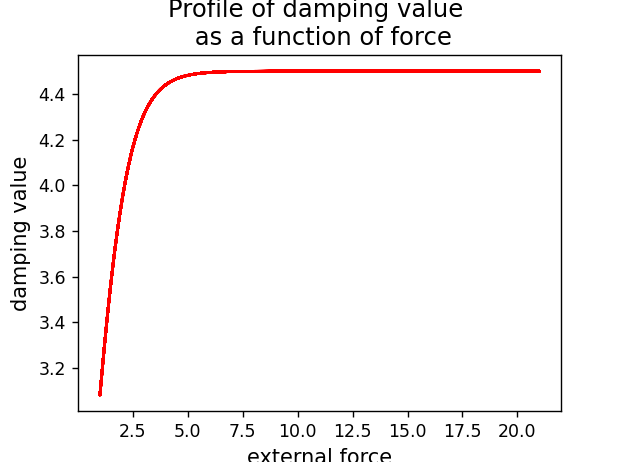

Text(0.5, 1.0, 'Profile of damping value \n as a function of force')

In [10]:
get_ipython().run_line_magic('matplotlib', 'notebook')
plt.plot(F2, c2(F2), c = 'red')
plt.xlabel("external force",fontsize =12); plt.ylabel("damping value", fontsize =12)
plt.title("Profile of damping value \n as a function of force", fontsize =14)

In [11]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
k1 = c.subs({I0 : 0.5, Ac_F: 2, r : 0.6, F_p : 0.5}) # Ac_F = 1 for lower adaptive capacity
k2 = sm.lambdify(F, k1, "numpy" )

Text(0.5, 1.0, 'Profile of spring value \n as a function of force')

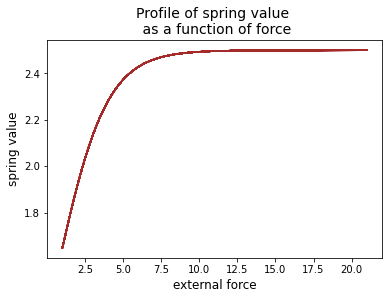

In [12]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(F2, k2(F2), c = 'brown')
plt.xlabel("external force", fontsize =12); plt.ylabel("spring value", fontsize =12)
plt.title("Profile of spring value \n as a function of force", fontsize =14)

In [13]:
chigh = c.subs({I0 : 0.25, Ac_F: 4, r : 1.2, F_p : 2.5}) ##Ac_F = 2 for higher adaptive capacity
cH = sm.lambdify(F, chigh, "numpy" )

clow = c.subs({I0 : 0.25, Ac_F: 2, r : 1.2, F_p : 2.5}) 
cL = sm.lambdify(F, clow, "numpy" )

<IPython.core.display.Javascript object>


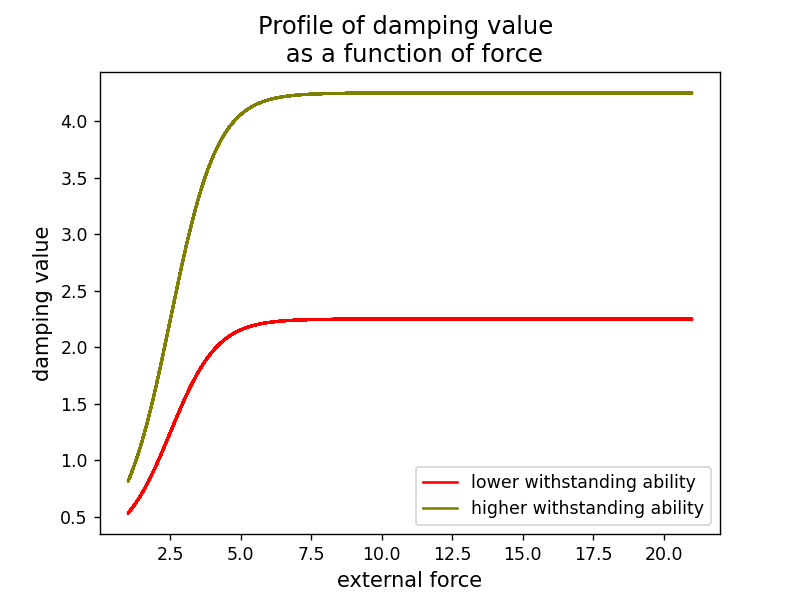

Text(0.5, 1.0, 'Profile of damping value \n as a function of force')

In [14]:
get_ipython().run_line_magic('matplotlib', 'notebook')
plt.plot(F2, cL(F2), c = 'red', label = "lower withstanding ability")
plt.plot(F2, cH(F2), c = 'olive', label = "higher withstanding ability")
plt.legend()
plt.xlabel("external force",fontsize =12); plt.ylabel("damping value", fontsize =12)
plt.title("Profile of damping value \n as a function of force", fontsize =14)

In [15]:
khigh = c.subs({I0 : 0.5, Ac_F: 2, r : 0.6, F_p : 0.5}) 
kH = sm.lambdify(F, khigh, "numpy" )

klow = c.subs({I0 : 0.5, Ac_F: 1, r : 0.6, F_p : 0.5}) 
kL = sm.lambdify(F, klow, "numpy" )

<IPython.core.display.Javascript object>


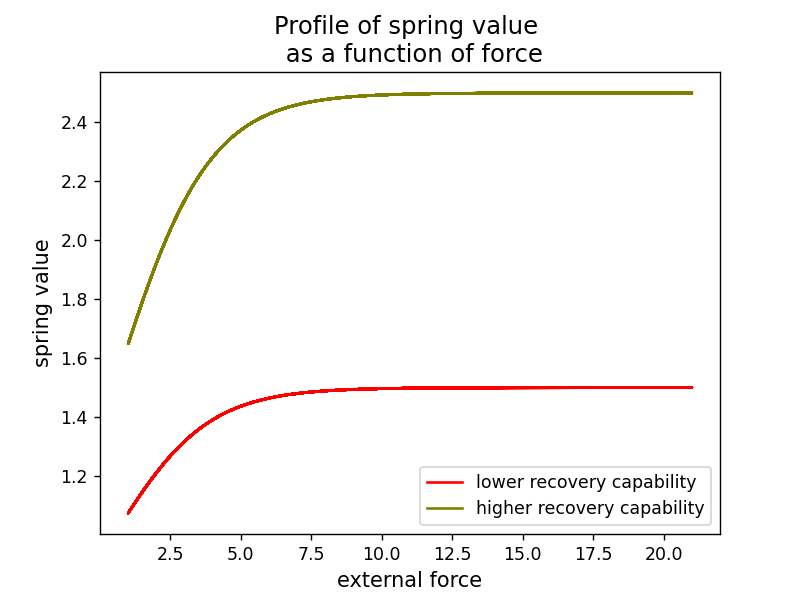

Text(0.5, 1.0, 'Profile of spring value \n as a function of force')

In [16]:
get_ipython().run_line_magic('matplotlib', 'notebook')
plt.plot(F2, kL(F2), c = 'red', label = "lower recovery capability")
plt.plot(F2, kH(F2), c = 'olive', label = "higher recovery capability")
plt.legend()
plt.xlabel("external force", fontsize =12); plt.ylabel("spring value", fontsize =12)
plt.title("Profile of spring value \n as a function of force", fontsize =14)

In [17]:
import random as rn
import pylab as pl

get_ipython().run_line_magic('matplotlib', 'inline')
def varying_extForce(N, Ts, ampl, mg):
    x0=pl.arange(0,N,Ts)
    sigs = np.zeros([10, len(x0)])

    phi = pl.linspace(0.001, 0.3, 100)
    amp = pl.linspace(2, 5, 100)

    for i in np.arange(10):

        amp1 = amp[rn.randint(0, 99)]
        phi1 = phi[rn.randint(0, 99)]

        y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
        sigs[i,:] = y1
        
    sigs1 = ampl*np.apply_along_axis(np.mean, 0, sigs)
    plt.plot(sigs1)
    return(sigs1)

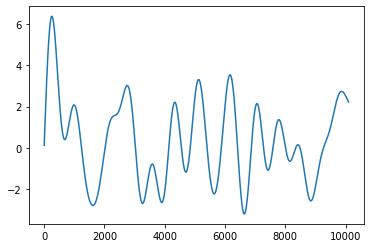

In [29]:
from scipy.integrate import solve_ivp
    
tend = 100
t_step = 0.01
t_span = (0, tend)
tint = np.linspace(0, tend, int(tend/t_step))
get_ipython().run_line_magic('matplotlib', 'inline')
extF= varying_extForce(tend+1, t_step, 2.5, 0.05)

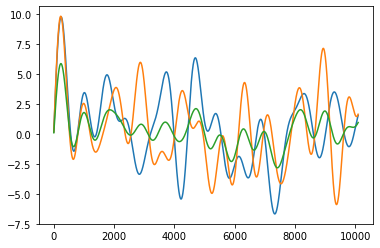

In [28]:
F_total = 0.3*varying_extForce(tend+1, t_step, 3.5, 0.05) + 0.3*varying_extForce(tend+1, t_step, 3.5, 0.05)
plt.plot(F_total)

In [43]:
def nonSDMS_nonF2_fun(t, u, M, tend, t_step, F1, F2, gr):
    
    from scipy.interpolate import interp1d

    x1 = u[0]
    x2 = u[1]
    
    xs = np.arange(len(F1))
    y_interp1 = interp1d(xs, F1)
    Frc1 = y_interp1(t/t_step)
    
    y_interp2 = interp1d(xs, F2)
    Frc2 = y_interp2(t/t_step)
    
    Frc = gr*(0.4*Frc1 + 0.4*Frc2)
    
#     print(t)
#     print([\Frc\, Frc])
    ##Force dependent spring-damper##
    Ki1 = kH(Frc1); Ci1 = cH(Frc1);
    Ki2 = kL(Frc2); Ci2 = cL(Frc2);
#     print(['Ki', Ki]); print(['Ci', Ci])
    ##Dynamic potential##
    
    Ki = 0.5*(Ki1 + Ki2)
    y2int = Ki*df
    y1dif = -1*sm.diff(y2int, x)
    y1dif_fun = sm.lambdify(x, y1dif)
    spring_val = (y1dif_fun(x1))
#     print(["spring cons", spring_val ])
    
    ##Dynamic damper
    Ci = 0.5*(Ci1 + Ci2)
    damp_cons = Ci*0.5*(3.5-0.25*x1**3 + 2*x1)
#     print(["damper cons", damp_cons ])

    du = np.zeros([2, 1])

    du[0] = x2
    du[1] = (1/M)*(Frc - damp_cons*x2 + spring_val)

    du = du.reshape(2,)

    return(du)


In [44]:
extF1 = varying_extForce(tend+1, t_step, 2.5, 0.05) 
extF2 = varying_extForce(tend+1, t_step, 2.5, 0.05) 

In [58]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 0.5)
start_time = timeit.default_timer()
slL0 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


28.094552612999905


In [48]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 0.75)
start_time = timeit.default_timer()
slL1 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

30.50843190699925


In [49]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 1)
start_time = timeit.default_timer()
slL2 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

32.59353835100046


In [50]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 1.5)
start_time = timeit.default_timer()
slL3 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

37.833397968999634


In [51]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 2)
start_time = timeit.default_timer()
slL4 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

41.0979171630006


In [52]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 2.5)
start_time = timeit.default_timer()
slL5 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

44.08869797600164


In [53]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 3)
start_time = timeit.default_timer()
slL6 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

47.750244340999416


In [54]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 3.5)
start_time = timeit.default_timer()
slL7 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

49.428628113999366


In [55]:
u0=np.array([0, 0.1])
p = (1, tend, t_step, extF1, extF2, 4)
start_time = timeit.default_timer()
slL8 = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

53.83782517000145


<IPython.core.display.Javascript object>


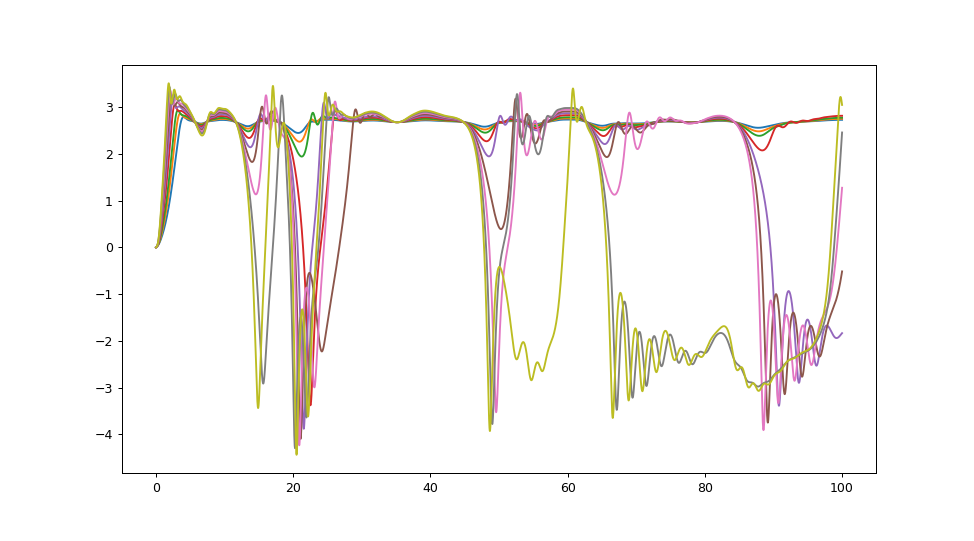

In [59]:
%matplotlib notebook
plt.plot(slL0.t, slL0.y[0])
plt.plot(slL1.t, slL1.y[0])
plt.plot(slL2.t, slL2.y[0])
plt.plot(slL3.t, slL3.y[0])
plt.plot(slL4.t, slL4.y[0])
plt.plot(slL5.t, slL5.y[0])
plt.plot(slL6.t, slL6.y[0])
plt.plot(slL7.t, slL7.y[0])
plt.plot(slL8.t, slL8.y[0])

In [90]:
def sdms_simu(j):

    extF1 = varying_extForce(tend+0.01, t_step, 2.5, 0.05) 
    extF2 = varying_extForce(tend+0.01, t_step, 2.5, 0.05) 
    
    iters = np.around((np.arange(0.1, 4, 0.2)),3)
    sdms_dt = np.zeros((len(iters), 10000))
    
    for i in np.arange(len(iters)):
    
        u0=np.array([0, 0])
    
        p = (1, tend, t_step, extF1, extF2, iters[i])
        LP_deq = solve_ivp (nonSDMS_nonF2_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
        sdms_dt[i] = LP_deq.y[0]


    ExtF = np.vstack((extF1[0:10000], extF2[0:10000]))
    sdms_dt0 = np.vstack((sdms_dt, ExtF))    
    sdms_dtt = np.transpose(sdms_dt0) 
    
    id='{0:02}'.format(j)
    DF = pd.DataFrame(sdms_dtt)
    fnm = "/home/karthik/jupyter_dir/SDMS/differential_multiple_force/simu_" + id + ".csv"
    DF.to_csv(fnm)
    print(j)

In [92]:
from joblib import Parallel, delayed
Parallel(n_jobs=8)(delayed(sdms_simu)(j) for j in np.arange(39))

In [1]:
import import_ipynb
%run /home/karthik/jupyter_dir/jupyter_env/IRI_calc.ipynb

In [93]:
import os
fls1 = os.listdir('differential_multiple_force//')
fls = list(filter(lambda f:f.endswith('.csv'), fls1))
len(fls)

24

In [167]:
rtidxss = np.zeros((1, 12))

for i in np.arange(len(fls)):
    
    df1 = pd.read_csv('differential_multiple_force/' + fls[i])
    df1=df1.rename(columns = {'Unnamed: 0':'id'})
    df = df1.iloc[500:]
    
    nids = np.arange(0, 20)
    rtidxs = np.zeros((len(nids), 12))
    
    iters = np.around((np.arange(0.1, 4, 0.2)),3)
    
    for j in nids:
        rtidxs0 = resilience_calc_func(np.array(df[str(j)]))
        frc1 = df1['20']; frc2 = df1['21']
        ufrc1 = np.mean(frc1*iters[j]); ufrc2 = np.mean(frc2*iters[j])
        vfrc1 = np.std(frc1*iters[j]); vfrc2 = np.std(frc2*iters[j])
        rtidxs[j] = (np.hstack((rtidxs0, ufrc1, vfrc1, ufrc2, vfrc2, i)))
    rtidxss = np.vstack((rtidxss, rtidxs))

    print(i)

[  41.   44.   50.   nan  100.  263.  277.  414.  263.  139.  292.  261.
  383.   nan  156.  132.  109.   nan  154.  767.  852. 1073.  717.  202.
  688.  669.  540.   nan]
[  41.   44.   50.  100.  109.  132.  139.  154.  156.  202.  261.  263.
  263.  277.  292.  383.  414.  540.  669.  688.  717.  767.  852. 1073.]
[ 73.  57. 399.  20. 298. 248. 188. 277.  52. 201. 218.  91. 116.  nan
 401. 657. 815. 913. 756. 521. 714. 699. 843.  92.]
[ 20.  52.  57.  73.  91.  92. 116. 188. 201. 218. 248. 277. 298. 399.
 401. 521. 657. 699. 714. 756. 815. 843. 913.]
[104. 464.  18. 294. 244. 185. 273.  48. 199. 216.  88.  nan 465. 657.
 812. 913. 756. 525. 715. 700. 846.  89.]
[ 18.  48.  88.  89. 104. 185. 199. 216. 244. 273. 294. 464. 465. 525.
 657. 700. 715. 756. 812. 846. 913.]
[133.   6. 290. 239. 182. 267.  36. 196. 213.  81. 661. 658. 809. 915.
 757. 538. 717. 701. 853.  nan]
[  6.  36.  81. 133. 182. 196. 213. 239. 267. 290. 538. 658. 661. 701.
 717. 757. 809. 853. 915.]
[122. 659.  nan  7

[393.  nan  nan 345. 215.  nan 710.  nan  nan  nan 412.  nan  nan 493.
  nan 331.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[215. 331. 345. 393. 412. 493. 710.]
[ nan  nan  nan  nan  nan  nan 251. 200.  nan  nan  nan  nan 216.  nan
  nan 522.  nan 218.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[200. 216. 218. 251. 522.]
[ nan  nan  nan  nan  nan  nan 462.  nan  nan 369.  nan  nan  nan  nan
 218.  nan  nan 531.  nan 216.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[216. 218. 369. 462. 531.]
[ nan  nan  nan  nan  nan  nan 296.  nan  nan 396.  nan  nan  nan  nan
 218.  nan  

[ 44.  49.  48.  49.  68.  nan 289. 216. 261. 245. 269.  nan 268. 415.
 218.  nan 248. 160. 148. 132. 127.  84.  nan 394. 525. 998. 578. 546.
  nan 269. 416. 725.  nan 249.]
[ 44.  48.  49.  49.  68.  84. 127. 132. 148. 160. 216. 218. 245. 248.
 249. 261. 268. 269. 269. 289. 394. 415. 416. 525. 546. 578. 725. 998.]
[  nan   74.   nan   nan  625.   44.  141.  381.  165.  121.  576.   nan
  146.  201.   31.   nan  345.   nan   nan   nan   nan  626.  558.  670.
  860. 1112.   nan   nan   nan  685.  257.   nan   nan   nan]
[  31.   44.   74.  121.  141.  146.  165.  201.  257.  345.  381.  558.
  576.  625.  626.  670.  685.  860. 1112.]
[ 112.   nan  568.  127.  358.   38.  111.  593.   nan  132.  149.   41.
   nan  363.   nan   nan   nan  682.  927. 1123.   nan   nan   nan  688.
  235.   nan   nan  364.]
[  38.   41.  111.  112.  127.  132.  149.  235.  358.  363.  364.  568.
  593.  682.  688.  927. 1123.]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 843.  nan  nan  nan
  nan  nan

[  61.   nan   nan 1038.   67.   nan   nan  558.  140.  145.   84.   nan
  348.   nan  309.   nan  802.  101.   nan  298.   68.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan  299.   nan   nan   nan   nan]
[  61.   67.   68.   84.  101.  140.  145.  298.  299.  309.  348.  558.
  802. 1038.]
[ nan  nan  nan  nan  nan  nan  nan  nan 624.  nan  nan  nan 273. 140.
  nan 248.  nan 878. 104.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[104. 140. 248. 273. 624. 878.]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan 667. 261. 184. 284.  nan
 208.  nan 930. 343.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan 511.  nan  nan  nan  nan  nan  nan 665.  nan  nan]
[184. 208. 261. 284. 343. 511. 665. 667. 930.]
[ 62.  nan  nan  nan 852.  70.  nan  nan  nan 572. 256. 180. 339.  nan
 227.  nan 

[  61.   nan  267.  344.   nan   90.   nan   nan   nan   nan   nan  846.
  113.   nan  350.   64.  149.   nan   nan  314.  110.   nan  267.   nan
   nan   nan  422.   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan 1203.   nan   nan   nan   nan   nan   nan   nan]
[  61.   64.   90.  110.  113.  149.  267.  267.  314.  344.  350.  422.
  846. 1203.]
[  47.   nan  281.   nan  185.  189.   nan   nan   nan   nan  883.  109.
   nan   nan 1254.  136.   nan   nan  305.  106.   nan  281.   nan   nan
   nan   nan  269.   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan]
[  47.  106.  109.  136.  185.  189.  269.  281.  281.  305.  883. 1254.]
5
[ 47.  51.  nan  nan 304.  nan 211. 235. 150. 115. 238. 215.  nan 245.
 235. 124. 114.  nan  nan 365.  nan 702. 555. 151. 134. 575. 603.  nan
 445. 721.]
[ 47.  51. 114. 115. 124. 134. 150. 151. 211. 215. 235. 235. 238. 245.
 304. 365. 445. 555. 575. 603. 702. 721.]
[ nan  nan 598.  57.

[ nan  nan  nan  nan  nan 872.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[872.]
[ nan  nan  nan  nan  nan 853.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[853.]
[ nan  nan  nan  nan  nan 802.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan 628.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[628. 802.]
[ nan  nan  nan  nan  nan 790.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan 561.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[561. 790.]
[ n

[ nan  nan  nan  nan  nan 567. 153.  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan 197.  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[153. 197. 567.]
[  nan   nan   nan  745.  251.  281.   nan   nan   nan 1330.   nan   nan
   nan   nan   nan   nan   nan   nan  684.   nan   nan   nan   nan   nan
   nan   nan   nan   nan]
[ 251.  281.  684.  745. 1330.]
[  30.   nan   nan  615.  240.  250.  273.   nan   nan   nan   nan   nan
 1173.  401.   nan   nan  505.   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[  30.  240.  250.  273.  401.  505.  615. 1173.]
[  51.   nan   nan  602.  210.  314.  265.   nan   nan   nan   nan   nan
   nan 1156.  381.   nan   nan  459.   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
[  51.  210.  265.  314.  381.  459.  602. 1156.]
[  58.   nan   nan  600.  200.  347.  276.   nan   nan   nan   nan   nan
   nan 1151.  

[ 631.  146.   nan   nan   nan 1277.   nan   nan  358.   nan   nan   nan
   nan  603.  283.   nan   nan   nan   nan   nan  531.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 146.  283.  358.  531.  603.  631. 1277.]
[ 635.  235.   nan   nan   nan 1279.   nan   nan  372.   nan   nan   nan
   nan  606.  267.   nan   nan   nan   nan   nan  533.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 235.  267.  372.  533.  606.  635. 1279.]
[ 628.  211.   nan   nan   nan 1270.   nan   nan  431.   nan   nan   nan
   nan  601.  262.   nan   nan   nan   nan   nan  523.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 211.  262.  431.  523.  601.  628. 1270.]
[ 624.  189.   nan   nan   nan 1265.   nan   nan   nan  284.   nan   nan
   nan  598.  261.   nan

[ 762.   95.  269.  668.  348.  296.  270.  182.  466.   nan  748.   nan
  669. 1026.  839.  891.   nan   nan]
[  95.  182.  269.  270.  296.  348.  466.  668.  669.  748.  762.  839.
  891. 1026.]
[ 766.   90.  263.  676.  317.  287.  263.  161.   nan  305.   nan  750.
   nan   nan 1032.  834.  893.   nan   nan  306.]
[  90.  161.  263.  263.  287.  305.  306.  317.  676.  750.  766.  834.
  893. 1032.]
[ 773.   85.  255.  688.  277.  273.  256.  143.   nan  297.   nan  755.
   nan   nan 1037.  827.  895.   nan   nan   nan]
[  85.  143.  255.  256.  273.  277.  297.  688.  755.  773.  827.  895.
 1037.]
[ 782.   78.  242.  705.  225.  191.   nan  381.  243.  129.   15.  288.
   nan  763.   nan   nan 1048.   nan   nan   nan  898.  227.   nan   nan]
[  15.   78.  129.  191.  225.  227.  242.  243.  288.  381.  705.  763.
  782.  898. 1048.]
[ 804.   61.  217.   nan  750.  127.  157.   15.  370.  218.  123.   14.
  260.  805.  780.   nan   nan   nan 1067.  262.   nan   nan  905.  215.
  

[ nan  nan 756. 388.  nan 382.  nan  nan  nan  nan  nan 430.  nan  nan
  nan  nan  nan 353.  nan 275.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[275. 353. 382. 388. 430. 756.]
[ nan  nan 737. 282.  nan  nan 319.  nan  nan  nan  nan  nan  nan 264.
  nan  nan  nan  nan  nan 345.  nan 318.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[264. 282. 318. 319. 345. 737.]
[ nan  nan 728. 239.  nan 524.  nan  nan  nan  nan  nan  nan 233.  nan
  nan  nan  nan  nan 342.  nan  nan 300.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[233. 239. 300. 342. 524. 728.]
[ nan  nan 716. 225.  nan 550.  nan  nan 329. 172.  nan  nan  nan  nan
  nan  nan 334.  nan  nan  nan 380.  nan  nan  nan  nan  n

[ nan  nan  nan  nan 955.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[955.]
[ nan  nan  nan  nan 712. 388. 400.  nan  nan  nan 413.  81.  nan  nan
  nan  nan  nan  nan  nan  nan 506.  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[ 81. 388. 400. 413. 506. 712.]
[ nan  nan  nan  nan 846. 222.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan 656.  nan  nan  nan  nan  nan  nan  nan  nan]
[222. 656. 846.]
[ nan  nan  nan  nan 830.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[830.]
[ nan  nan  nan  nan 812.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[812.]
[ nan  nan  nan  nan 797.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[797.]
[ nan  nan  nan  nan 784.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  n

[408. 193.  nan  nan  nan  nan  nan 543.  nan 202. 389.  45.  nan 780.
  nan 258.  nan 388. 265.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[ 45. 193. 202. 258. 265. 388. 389. 408. 543. 780.]
16
[ 40.  52. 298.  nan 438. 251. 240. 231. 529.  nan 225. 232. 171. 312.
 207.  nan 135. 104.  nan  nan  nan 409. 514. 233. 530.  nan 552. 504.
 173. 315. 482.  nan]
[ 40.  52. 104. 135. 171. 173. 207. 225. 231. 232. 233. 240. 251. 298.
 312. 315. 409. 438. 482. 504. 514. 529. 530. 552.]
[ 46.  nan 313.  nan  nan  nan 160.  70. 136.  nan 215. 612. 147. 127.
  nan 108. 119.  nan  nan  nan  nan  nan  nan 683. 606. 600.  nan  nan
  nan 582. 496.  nan 559. 120.]
[ 46.  70. 108. 119. 120. 127. 136. 147. 160. 215. 313. 496. 559. 582.
 600. 606. 612. 683.]
[ 17. 518.  nan  nan  nan 155.  70. 134.  nan 210. 613. 141. 124. 336.
 105. 118.  nan  nan  nan  nan  nan 682. 607. 600.  nan  nan  nan 581.
 496

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan 568.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[568.]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 781.  29.  nan  nan
  nan 547.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 29. 547. 781.]
[ nan  nan  nan  nan 801.  54. 330.  62.  nan  nan 740.  89.  nan  nan
  nan  nan  nan 528.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan]
[ 54.  62.  89. 330. 528. 740. 801.]
[ nan  nan  nan  nan 789. 229.  nan  nan  nan  nan 534. 249.  nan  nan
  nan  nan 537.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]
[229. 249. 534. 537. 789.]
[ nan  nan  nan  nan  na

[ nan  nan  nan  nan 654. 144.  nan  nan  nan 643.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[144. 643. 654.]
[ nan  nan  nan  nan 643. 143.  nan  nan  nan 645.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[143. 643. 645.]
[ nan  nan  nan  nan 625. 153.  nan  nan 641.  nan  nan  nan  nan  nan
 439.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan 749.  nan  nan  nan  nan
  nan  nan  nan  nan]
[153. 439. 625. 641. 749.]
19
[ 44.  49.  45.  69.  nan 272. 538. 221. 178. 172. 390. 247. 358.  nan
 177. 152. 120.  90.  nan 569. 905. 593. 523. 715. 868. 648. 763.  nan]
[ 44.  45.  49.  69.  90. 120. 152. 172. 177. 178. 221. 247. 272. 35

[613.  69. 107.  nan 248. 130. 112. 147. 121. 109. 251. 122. 352. 139.
  49. 124.  22. 124. 111.  nan  nan 614. 516.  nan  nan  nan 471. 641.
 494. 511.  nan  nan  nan 353. 226. 111. 218.  nan  nan  nan  nan  nan]
[ 22.  49.  69. 107. 109. 111. 111. 112. 121. 122. 124. 124. 130. 139.
 147. 218. 226. 248. 251. 352. 353. 471. 494. 511. 516. 613. 614. 641.]
[637.  52. 102.  nan 255. 112. 100. 116. 101. 101.  nan 255. 117. 341.
 128.  45. 122.  29. 115.  99.  nan  nan  nan 527.  nan  nan  nan 491.
 659. 519. 527.  nan  nan  nan  nan  nan 227. 120. 204.  nan  nan  nan
  nan  nan]
[ 29.  45.  52.  99. 100. 101. 101. 102. 112. 115. 116. 117. 120. 122.
 128. 204. 227. 255. 255. 341. 491. 519. 527. 527. 637. 659.]
[ nan 581.  98.  nan  nan 610.  21.  nan 619.  53.  nan 303. 107. 367.
 111. 151. 316. 115.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan 406.  nan  nan  nan  nan]
[ 21.  53.  98. 107. 111. 115. 151. 303. 316. 367. 406. 581. 610. 619.]

[  nan   nan   nan   nan   nan   nan   nan   nan   nan  331.   nan   nan
   nan   nan  304.   nan   nan   nan   nan   nan   nan   nan   nan 1263.
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan]
[ 304.  331. 1263.]
[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan  321.   nan
   nan   nan   nan  289.   nan   nan   nan   nan   nan   nan   nan   nan
 1244.   nan  426.   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan]
[ 289.  321.  426. 1244.]
[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan  312.   nan
   nan   nan   nan  280.  310.   27.   nan   nan   nan   nan   nan   nan
 1228.   nan  413.   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan  

In [168]:
rtidxss1 = np.delete(rtidxss, 0, 0)

In [169]:
rtid_df = pd.DataFrame(rtidxss1)

In [171]:
rtid_df.columns = ['uRg', 'uRr', 'uRt', 'Ri', 'vRg', 'vRr', 'vRt', 'uF1', 'vF1', 'uF2', 'vF2', 'id']

In [173]:
rtid_df.to_csv('multiple_force_return_index.csv')